[[  0   0   0 ...,  21  21  21]
 [  0   0   0 ...,  21  21  21]
 [  0   0   0 ...,  21  21  21]
 ..., 
 [416 416 416 ..., 420 420 420]
 [416 416 416 ..., 420 420 420]
 [416 416 416 ..., 420 420 420]]


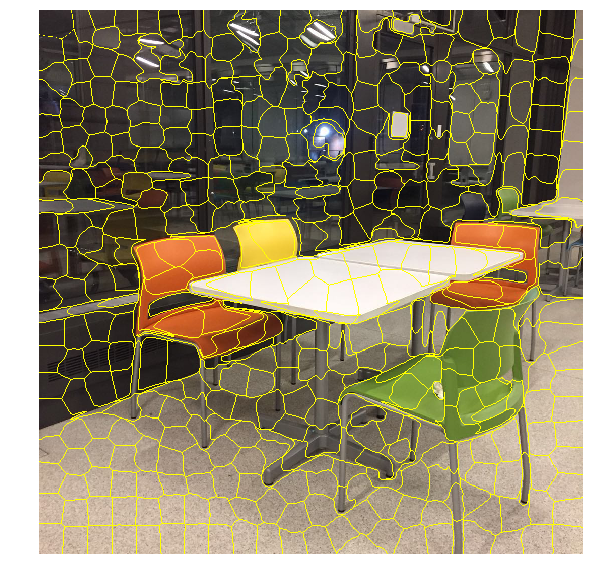

In [167]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import pandas as pd 
import cv2
import numpy as np
from PIL import Image

# load the image and convert it to a floating point data type
image = img_as_float(io.imread("1.jpeg"))

# loop over the number of segments
numSegments = 500
# apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(image, n_segments = numSegments, sigma = 5)
print(segments)
df = pd.DataFrame(segments)
df.to_csv("segments.csv")

# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments" % (numSegments), figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")
    

# show the plots
plt.show()

(1080, 1080)
(2421, 128)


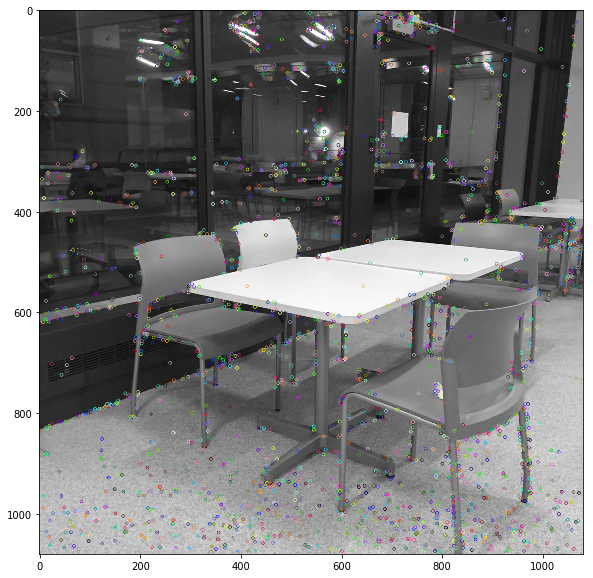

{'algorithm': 0, 'trees': 5}


In [168]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 50

img1 = cv2.imread('1.jpeg',0) # queryImage
img2 = cv2.imread('2.jpeg',0) # trainImage

print(img1.shape)
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
print(des1.shape)


img00 = cv2.drawKeypoints(img1,kp1,None)
plt.figure(figsize=(10,10))
plt.imshow(img00)

# plt.imshow(img00)
plt.show()
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
print(index_params)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m, n in matches:
    if m.distance < 0.65*n.distance:
        good.append(m)

In [169]:
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
len(good)

Not enough matches are found - 30/50


30

(1080, 2160, 3)


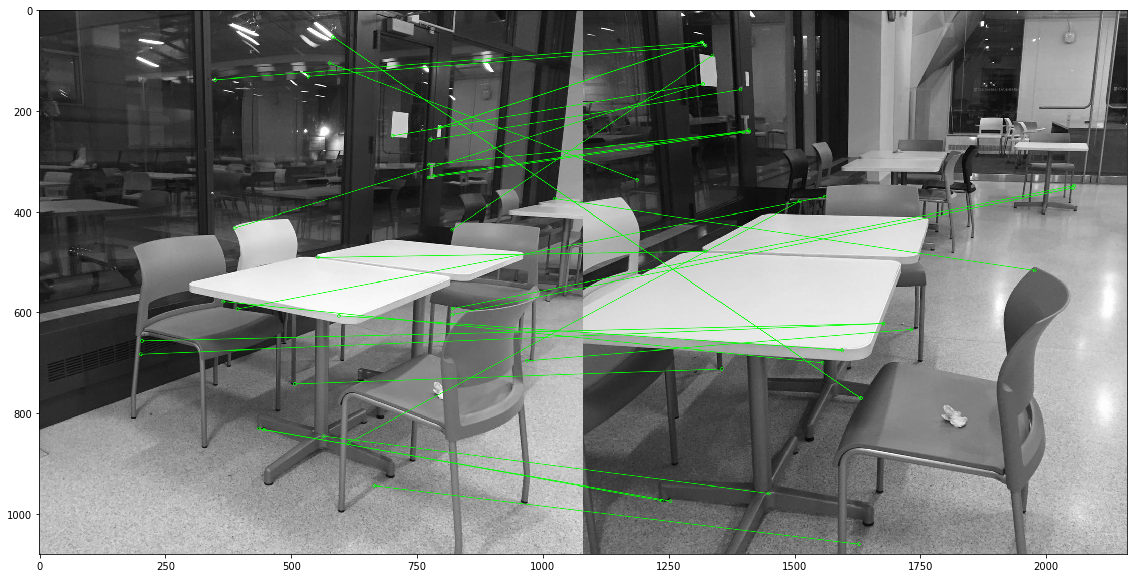

In [173]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
print(img3.shape)

plt.figure(figsize=(20,10))
plt.imshow(img3, interpolation='none',)
plt.show()